In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../')
from scripts.neuralnetwork.rnn import RNN

In [2]:
r = RNN(loss='mae',metrics=['mse'], lstm=[32,64],dense=[64,32], window_size=200)
r.get_data(file_path='../../dataset/encoded_smooth2.npy')
r.build_model()
r.train_model()

Epoch 1/200
2003/2003 [==============================] - 247s 121ms/step - loss: 0.4363 - mse: 0.4756 - val_loss: 0.1500 - val_mse: 0.0453
Epoch 2/200
2003/2003 [==============================] - 231s 115ms/step - loss: 0.3445 - mse: 0.2484 - val_loss: 0.1193 - val_mse: 0.0298
Epoch 3/200
2003/2003 [==============================] - 240s 120ms/step - loss: 0.3369 - mse: 0.2395 - val_loss: 0.1130 - val_mse: 0.0269
Epoch 4/200
2003/2003 [==============================] - 238s 119ms/step - loss: 0.3247 - mse: 0.2213 - val_loss: 0.1176 - val_mse: 0.0296
Epoch 5/200
2003/2003 [==============================] - 242s 121ms/step - loss: 0.3240 - mse: 0.2220 - val_loss: 0.1036 - val_mse: 0.0228
Epoch 6/200
2003/2003 [==============================] - 240s 120ms/step - loss: 0.3220 - mse: 0.2209 - val_loss: 0.1067 - val_mse: 0.0239
Epoch 7/200
2003/2003 [==============================] - 242s 121ms/step - loss: 0.3201 - mse: 0.2182 - val_loss: 0.1086 - val_mse: 0.0224
Epoch 8/200
2003/2003 [====

KeyboardInterrupt: 

In [5]:
test = np.load('../../dataset/encoded_smooth2.npy')[0]

forecast = r.predict_future(test[:r.window_size],1000-r.window_size)

forecast_full = np.concatenate((test[:r.window_size], forecast), axis=0)

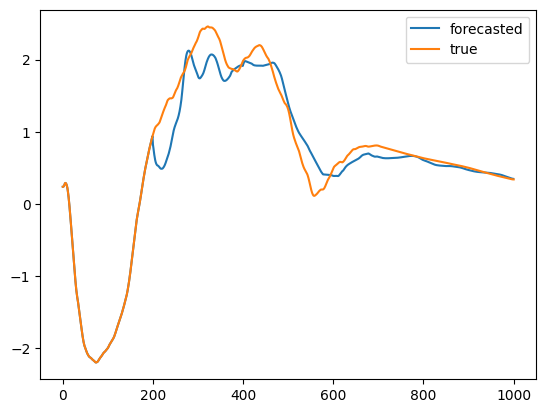

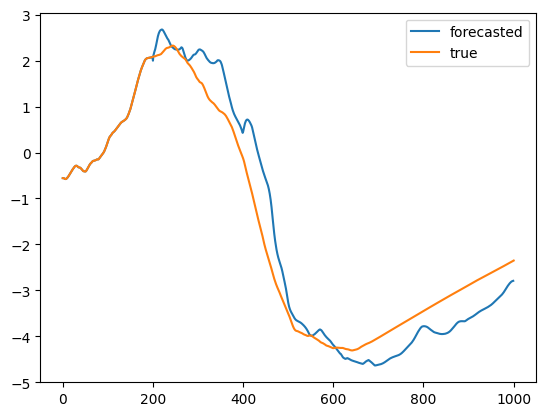

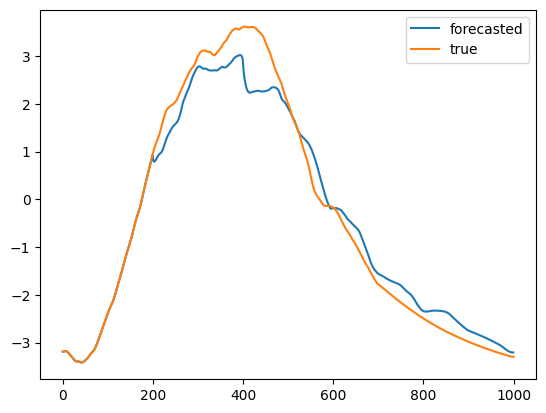

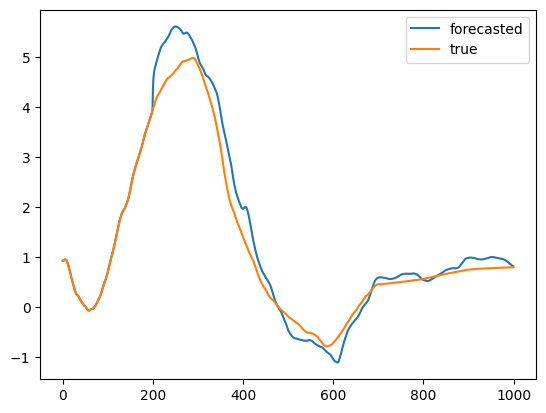

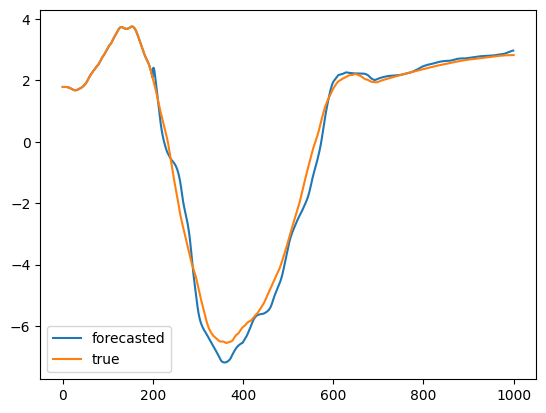

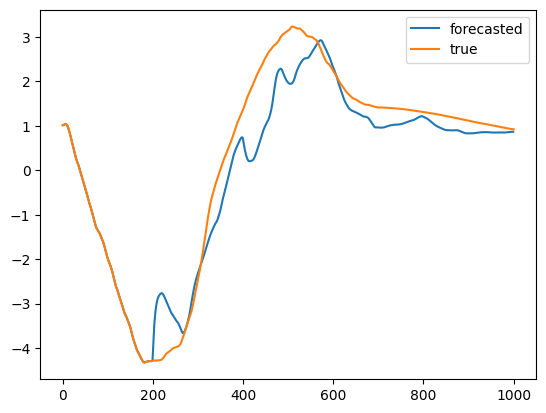

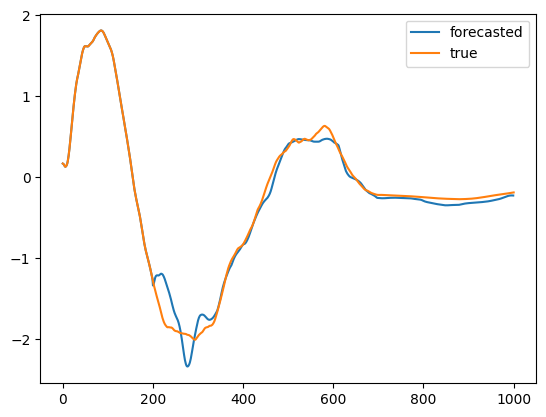

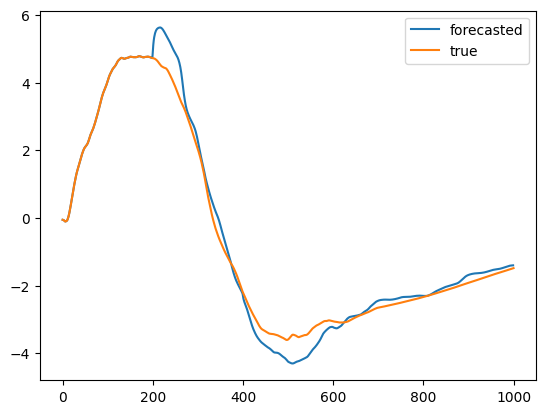

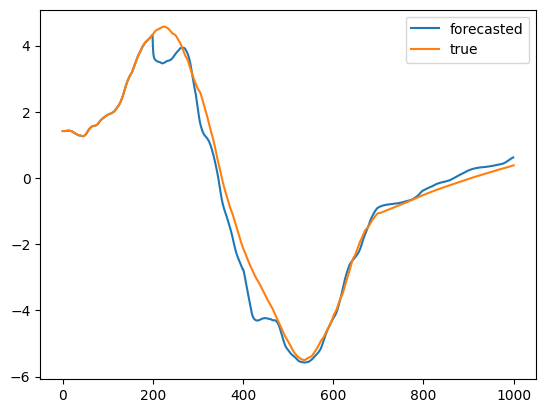

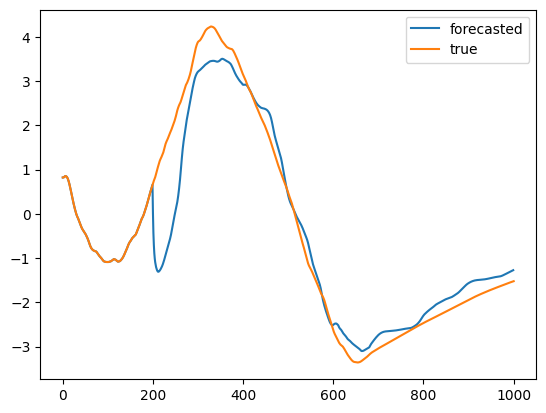

In [6]:
for i in range(10):
    plt.plot(forecast_full[:, i])
    plt.plot(test[:, i])
    plt.legend(['forecasted','true'])
    # plt.vlines(r.window_size, ymin=np.min(test[:,i]),ymax=np.max(test[:,i]), colors='red')
    plt.show()

In [7]:
from scripts.neuralnetwork.autoencoder import Autoencoder
a = Autoencoder(model_name='latdim10')
decoded = a.decode(forecast_full)
    

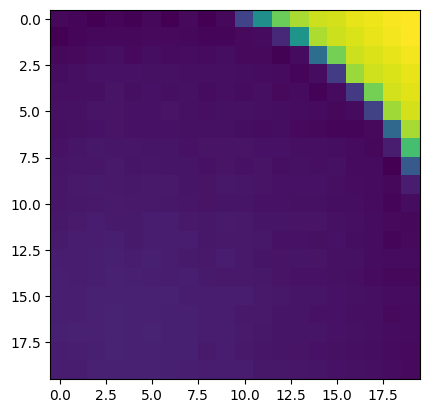

In [8]:
plt.imshow(decoded[600,:,:,0])

In [9]:
r.save_model('rnn_smooth2')